# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [53]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [54]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [55]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [56]:
from bs4 import BeautifulSoup
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [57]:
# Extract all rows of data
rows= soup.find_all('tr', class_= "data-row")
rows
#Extrct hdeader
header_t= soup.find_all('th')
header_t


[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

In [58]:
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [59]:
headers = []

# Create a for loop to extract the header elements 
for header in header_t: 
    heading = header.text.strip()
    headers.append(heading)

print(headers)


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [60]:
table_rows = []

# Create a for loop to extract the text content of each row
for row in rows:
    t_r = row.text.strip()
    table_rows.append(t_r)
table_rows_split = [row.split('\n') for row in table_rows]
# Print the list of extracted row contents
print(table_rows_split)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [61]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(table_rows_split, columns=headers)


In [62]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [63]:
# Examine data type of each column
df.info()
#option2 print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [64]:
# Change data types for data analysis
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol']=pd.to_numeric(df['sol'])
df['ls']=pd.to_numeric(df['ls'])
df['month']=pd.to_numeric(df['month'])
df['min_temp']=pd.to_numeric(df['min_temp'])
df['pressure']=pd.to_numeric(df['pressure'])
#df['pressure']=df['pressure'].astype(float)



In [65]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [66]:
# 1. How many months are there on Mars?
months = df['month'].nunique()
print(f"There are {months} on Mars.")

There are 12 on Mars.


In [67]:
# 2. How many Martian days' worth of data are there?
sol_days=df['sol'].count()
print(f"There are {sol_days} Martian days worth of data.")


There are 1867 Martian days worth of data.


In [68]:
# 3. What is the average low temperature by month?
average_low_temp = df.groupby('month')['min_temp'].mean()

#put the info in a dataframe (my preference)
alt_df=pd.DataFrame(average_low_temp)
alt_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


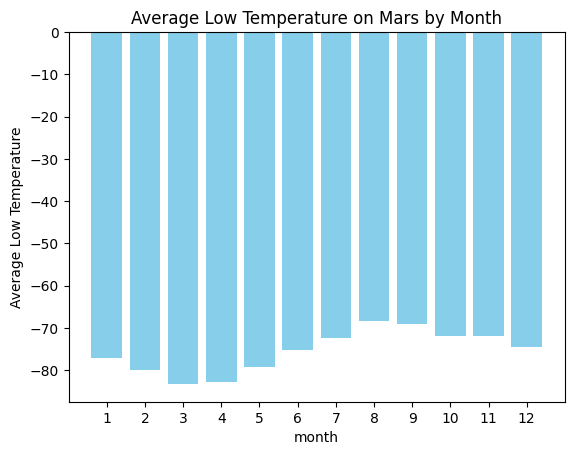

In [69]:
# Plot the average temperature by month
# Create a bar graph
plt.bar(average_low_temp.index, average_low_temp, color='skyblue')

# Set labels and title
plt.xlabel('month')
plt.ylabel('Average Low Temperature')
plt.title('Average Low Temperature on Mars by Month')
plt.xlim(0)
# Set x-axis ticks from 1 to 12
plt.xticks(np.arange(1, 13, 1))
# Show the plot
plt.show()

In [98]:
# 3. coldest and warmest months on Mars
mintemp=df.groupby('month')['min_temp'].mean().sort_values()
mintemp_df= pd.DataFrame(mintemp)
mintemp_df

,min_temp
month,
3,-83.307292
4,-82.747423
2,-79.932584
5,-79.308725
1,-77.160920
6,-75.299320
12,-74.451807
7,-72.281690
11,-71.985507


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

In [72]:
# 4. Average pressure by Martian month
average_pressure = df.groupby('month')['pressure'].mean()

#put the info in a dataframe (my preference)
ap_df=pd.DataFrame(average_pressure)
ap_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


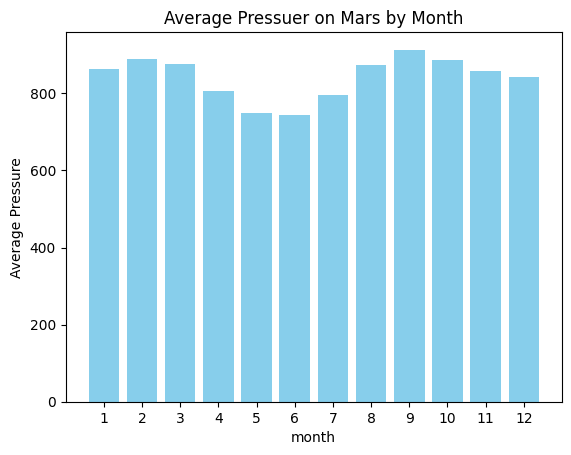

In [73]:
# Plot the average pressure by month
plt.bar(average_pressure.index, average_pressure, color='skyblue')

# Set labels and title
plt.xlabel('month')
plt.ylabel('Average Pressure')
plt.title('Average Pressuer on Mars by Month')
plt.xlim(0)
# Set x-axis ticks from 1 to 12
plt.xticks(np.arange(1, 13, 1))
# Show the plot
plt.show()

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

In [89]:
# 5. How many terrestrial (earth) days are there in a Martian year?
max=df['terrestrial_date'].max()
min=df['terrestrial_date'].min()

#Calculate the number of Earth days in a Martian year (687 days)
earth_days_in_martian_year = 687

# Calculate the number of Earth days between the minimum and maximum dates
earth_days_elapsed = (max - min).days

print(f"There are approximately {earth_days_elapsed} Earth days in the given time span.")
print(f"This is equivalent to approximately {earth_days_elapsed / earth_days_in_martian_year:.2f} Martian years.")

There are approximately 2021 Earth days in the given time span.
This is equivalent to approximately 2.94 Martian years.


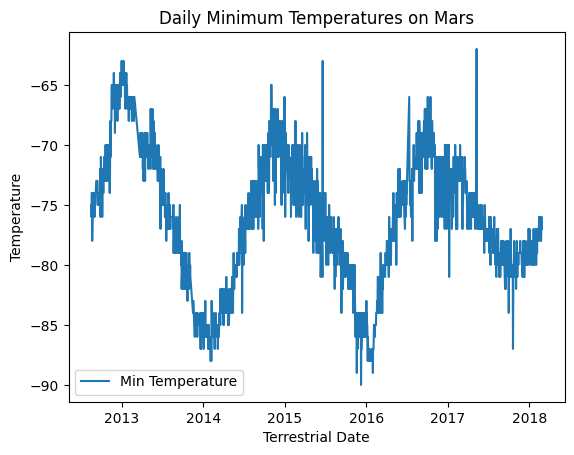

In [82]:
terrestrial_dates = df['terrestrial_date']
min_temperatures = df['min_temp']

# Plotting the daily minimum temperatures over time
plt.plot(terrestrial_dates, min_temperatures, label='Min Temperature')
plt.title('Daily Minimum Temperatures on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [76]:
# Write the data to a CSV
df.to_csv("Mars data.csv")

In [ ]:
browser.quit()